In [6]:
import pandas as pd 
import datetime
from stockai import Stock
import matplotlib.pyplot as plt 

%matplotlib inline

In [11]:
stocks = ['AMZN', 'MSFT', 'INTC', 'FB', 'GOOG', 'TSLA']

start = (datetime.datetime.today() - datetime.timedelta(365)).strftime('%Y-%m-%d')
end = datetime.datetime.today().strftime('%Y-%m-%d')

# print(start)
# print(end)

close_prices = pd.DataFrame()
ohlcv_data = {}

# Loop through stock
for ticker in stocks:
    sk = Stock(ticker)
    data = sk.get_historical_prices(start, end)

    ohlcv_data[ticker] = data

#     print(len(data['open']))
    close_prices[ticker] = data['adjclose']
    close_prices['date'] = data['date']

# Convert & set date as index
close_prices['date'] = pd.to_datetime(close_prices['date'], unit='s').dt.strftime('%Y-%m-%d')
close_prices.set_index('date', inplace=True)    
close_prices.head()

,AMZN,MSFT,INTC,FB,GOOG,TSLA
date,,,,,,
2020-03-02,1953.949951,171.051773,56.703815,196.440002,1389.109985,148.723999
2020-03-03,1908.989990,162.855057,54.549889,185.889999,1341.390015,149.102005
2020-03-04,1975.829956,168.834290,57.191128,191.759995,1386.520020,149.899994
2020-03-05,1924.030029,164.597351,55.514767,185.169998,1319.040039,144.908005
2020-03-06,1901.089966,159.944641,54.354961,181.089996,1298.410034,140.695999


array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

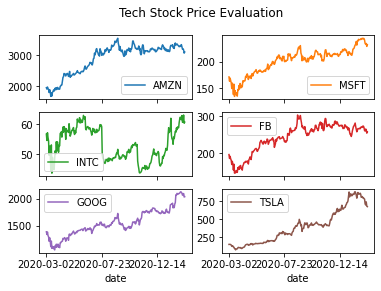

In [17]:
# Data visualization
close_prices.plot(subplots=True, layout=(3,2), title='Tech Stock Price Evaluation')

<AxesSubplot:xlabel='date'>

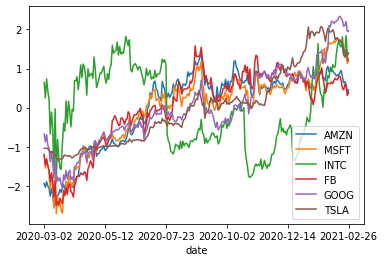

In [18]:
# Revised stock prices to the same scale
cp_standardized = (close_prices - close_prices.mean())/close_prices.std()
cp_standardized.plot()

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

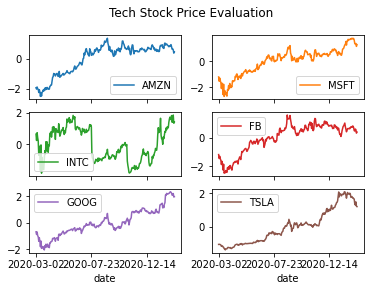

In [15]:
# Visualize every stock on the same scale
cp_standardized.plot(subplots=True, layout=(3,2), title='Tech Stock Price Evaluation')